# Getting data

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Corrected file path reference
path = "hotel_bookings.csv"

# Load CSV file using the correct path variable
data = pd.read_csv(path)

In [141]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [142]:
# Convert column names to lowercase
data.columns = data.columns.str.lower()

In [143]:
# Create a copy of the original data
df = data.copy()

In [144]:
# Summarizing the data
print(df.info())  # Structure of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [145]:
df.describe(include='all')  # Summary statistics

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [146]:
df.head()  # First few rows

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [147]:
df.shape  # Dimensions of the dataframe (rows,columns)

(119390, 32)

In [148]:
df.isna().sum()  # Count of missing values per column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [149]:
# Convert 'is_canceled' to categorical
df['is_canceled'] = df['is_canceled'].astype('category')

# Convert all character (object type) columns to categorical
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Display data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  category
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  category
 5   arrival_date_week_number        119390 non-null  int64   
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119386 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

In [150]:
# Deleting variables (columns) from the dataframe
df = df.drop(columns=['agent', 'company'])  # Too many null values or irrelevant variables

# Display summary statistics
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.0,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,2.0,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,12,NaN,3,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,0.0,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,A,NaN,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,75166.0,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,74053,NaN,104641,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,NaN,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,0.221124,NaN,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,NaN,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,0.652306,NaN,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,0.000000,NaN,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,0.000000,NaN,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,0.000000,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


# EDA

In [151]:
# Replacing missing values in 'children' column with corresponding values from 'babies' column
df.loc[df['children'].isna(), 'children'] = df['babies']

In [152]:
# Replacing 'Undefined' with 'SC' in the 'meal' column
df['meal'] = df['meal'].replace('Undefined', 'SC')

# Checking unique values in 'meal'
print(df['meal'].unique())

# Summary of the 'meal' column
df['meal'].describe()

['BB', 'FB', 'HB', 'SC']
Categories (4, object): ['BB', 'FB', 'HB', 'SC']


C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\4114489986.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['meal'] = df['meal'].replace('Undefined', 'SC')


count     119390
unique         4
top           BB
freq       92310
Name: meal, dtype: object

In [153]:
# Replacing 'Undefined' with 'Online TA' in the 'market_segment' column
df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')

# Checking unique values in 'market_segment'
df['market_segment'].unique()

C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\128896589.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['market_segment'] = df['market_segment'].replace('Undefined', 'Online TA')


['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Aviation']
Categories (7, object): ['Aviation', 'Complementary', 'Corporate', 'Direct', 'Groups', 'Offline TA/TO', 'Online TA']

In [154]:
# Replacing 'Undefined' with 'TA/TO' in the 'distribution_channel' column
df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'TA/TO')

# Checking unique values in 'distribution_channel'
df['distribution_channel'].unique()

C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\763328918.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['distribution_channel'] = df['distribution_channel'].replace('Undefined', 'TA/TO')


['Direct', 'Corporate', 'TA/TO', 'GDS']
Categories (4, object): ['Corporate', 'Direct', 'GDS', 'TA/TO']

In [155]:
# Checking missing values in numeric columns
missing_values = df.isna().sum()
missing_values

# Counting unique values in each column
unique_counts = df.nunique()
unique_counts

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 4
country                            177
market_segment                       7
distribution_channel                 4
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

In [156]:
# Creating new derived variables
df['stay_nights_total'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['stay_cost_total'] = df['adr'] * df['stay_nights_total']  # Total cost = Avg. Daily Rate (adr) * Total nights stayed

# Summary statistics
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,stay_nights_total,stay_cost_total
count,119390,119390.0,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390.000000
unique,2,2.0,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,4,NaN,NaN,NaN,3,926,NaN,NaN
top,City Hotel,0.0,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21,NaN,NaN
freq,79330,75166.0,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,89613,NaN,NaN,NaN,75166,1461,NaN,NaN
mean,NaN,NaN,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN,3.427900,357.848208
std,NaN,NaN,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN,2.557439,335.910109
min,NaN,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN,0.000000,-63.800000
25%,NaN,NaN,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN,2.000000,146.000000
50%,NaN,NaN,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN,3.000000,267.000000
75%,NaN,NaN,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN,4.000000,446.250000


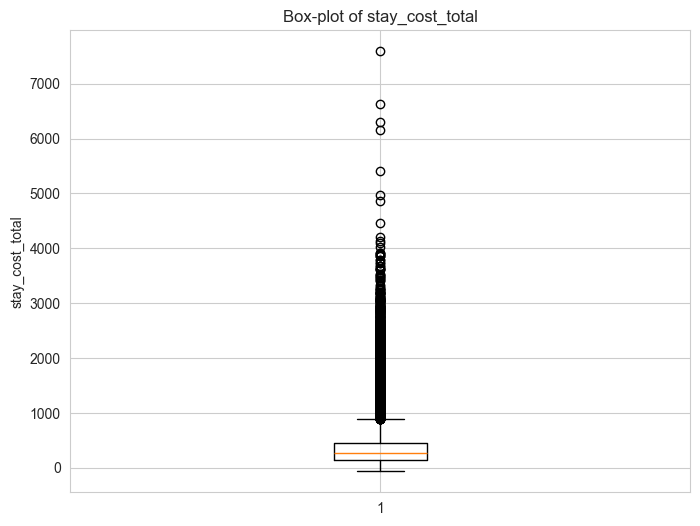

In [157]:
# Outlier Detection using Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot(df['stay_cost_total'], vert=True)
plt.title("Box-plot of stay_cost_total")
plt.ylabel("stay_cost_total")
plt.show()

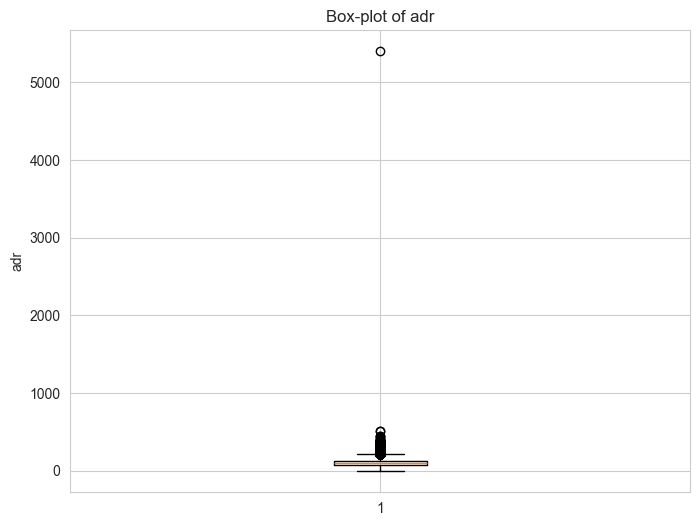

In [158]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['adr'], vert=True)
plt.title("Box-plot of adr")
plt.ylabel("adr")
plt.show()

In [159]:
# Detecting and treating outliers in the 'adr' column using the IQR method
adr_Q1 = df['adr'].quantile(0.25)  # 25th percentile
adr_Q3 = df['adr'].quantile(0.75)  # 75th percentile
adr_IQR = adr_Q3 - adr_Q1  # Interquartile range

# Define lower and upper bounds for outliers
adr_lower_bound = adr_Q1 - 1.5 * adr_IQR
adr_upper_bound = adr_Q3 + 1.5 * adr_IQR

# Cap outliers
df['adr'] = np.where(df['adr'] < adr_lower_bound, adr_lower_bound, df['adr'])
df['adr'] = np.where(df['adr'] > adr_upper_bound, adr_upper_bound, df['adr'])

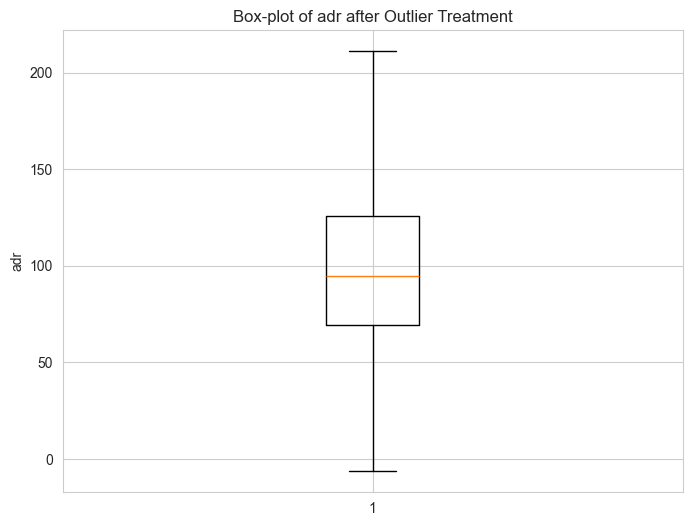

In [160]:
# Boxplot after outlier treatment
plt.figure(figsize=(8, 6))
plt.boxplot(df['adr'], vert=True)
plt.title("Box-plot of adr after Outlier Treatment")
plt.ylabel("adr")
plt.show()

C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\4263388298.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='hotel', palette='pastel')


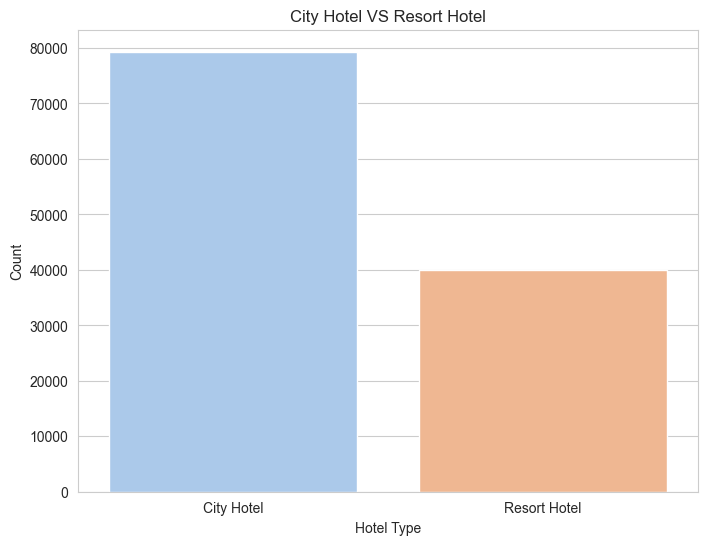

In [161]:
import seaborn as sns

# Set Seaborn style for better visualization
sns.set_style("whitegrid")

# The most visited hotel (City Hotel vs Resort Hotel)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hotel', palette='pastel')
plt.title("City Hotel VS Resort Hotel")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.show()


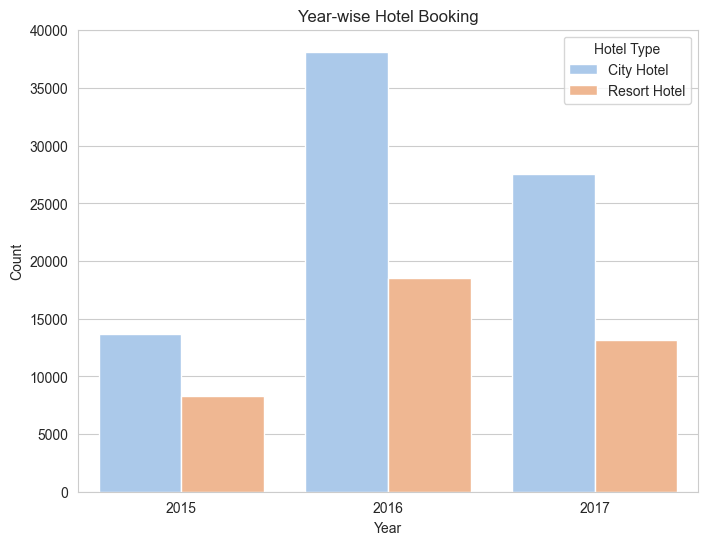

In [162]:
# Year-wise hotel booking
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='arrival_date_year', hue='hotel', palette='pastel')
plt.title("Year-wise Hotel Booking")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Hotel Type")
plt.show()

c:\Users\Personal\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Personal\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


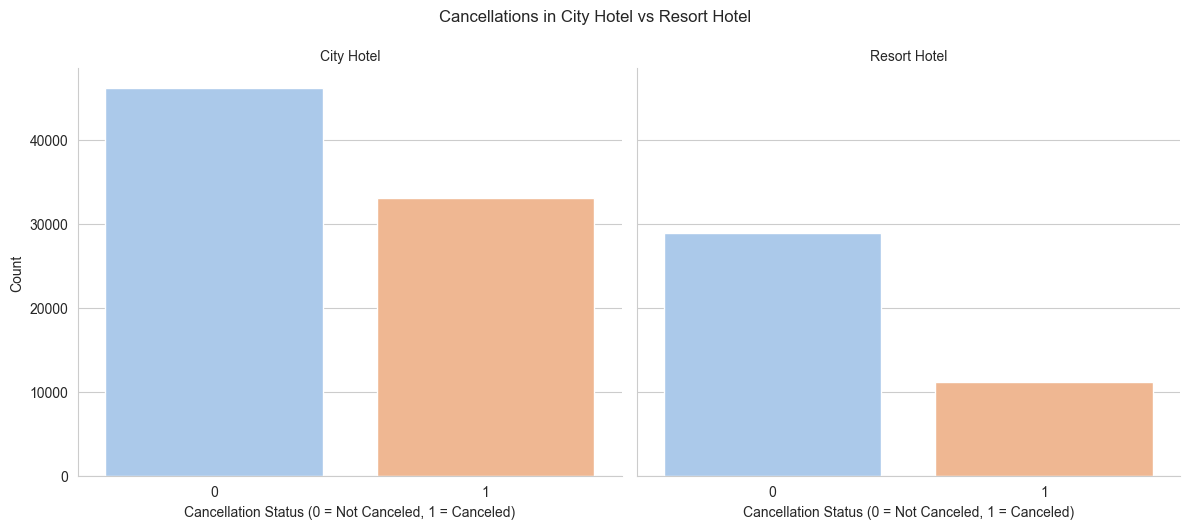

In [164]:
# Cancellations in City Hotel vs Resort Hotel
g = sns.FacetGrid(df, col="hotel", height=5, aspect=1.2)
g.map_dataframe(sns.countplot, x="is_canceled", palette="pastel")
g.set_axis_labels("Cancellation Status (0 = Not Canceled, 1 = Canceled)", "Count")
g.set_titles(col_template="{col_name}")
g.figure.suptitle("Cancellations in City Hotel vs Resort Hotel", y=1.05)
plt.show()

C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\1595932771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='arrival_date_month', palette='pastel', order=[


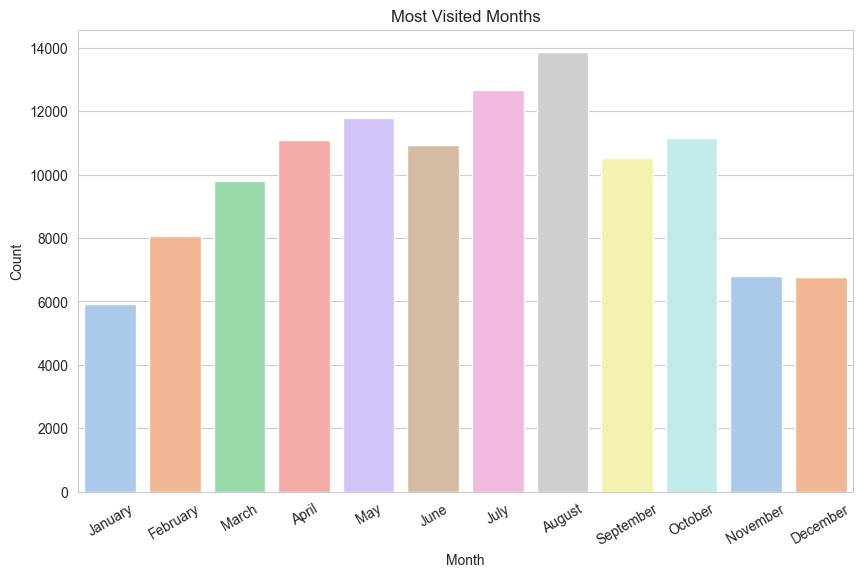

In [165]:
# Most visited months
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='arrival_date_month', palette='pastel', order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Add title and labels
plt.title("Most Visited Months")
plt.xlabel("Month")
plt.ylabel("Count")

# Show the plot
plt.show()

C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\1799976437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="distribution_channel", palette="pastel")


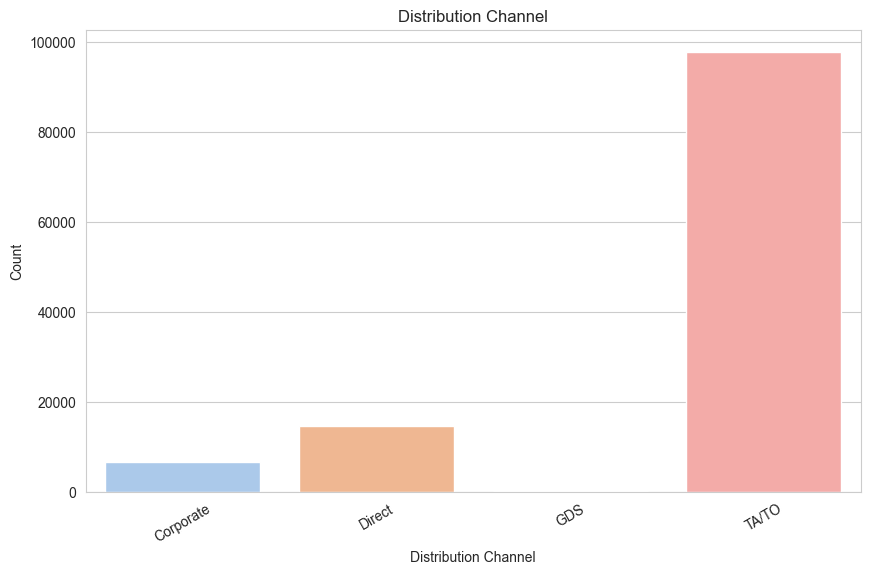

In [166]:
# Distribution Channel
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="distribution_channel", palette="pastel")

# Add title and labels
plt.title("Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Count")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Show the plot
plt.show()

C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\3941126552.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x="market_segment", palette="muted", ax=ax, order=sorted_order)
C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\3941126552.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x="market_segment", palette="muted", ax=ax, order=sorted_order)
C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\3941126552.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=subset, x="market_segment", palett

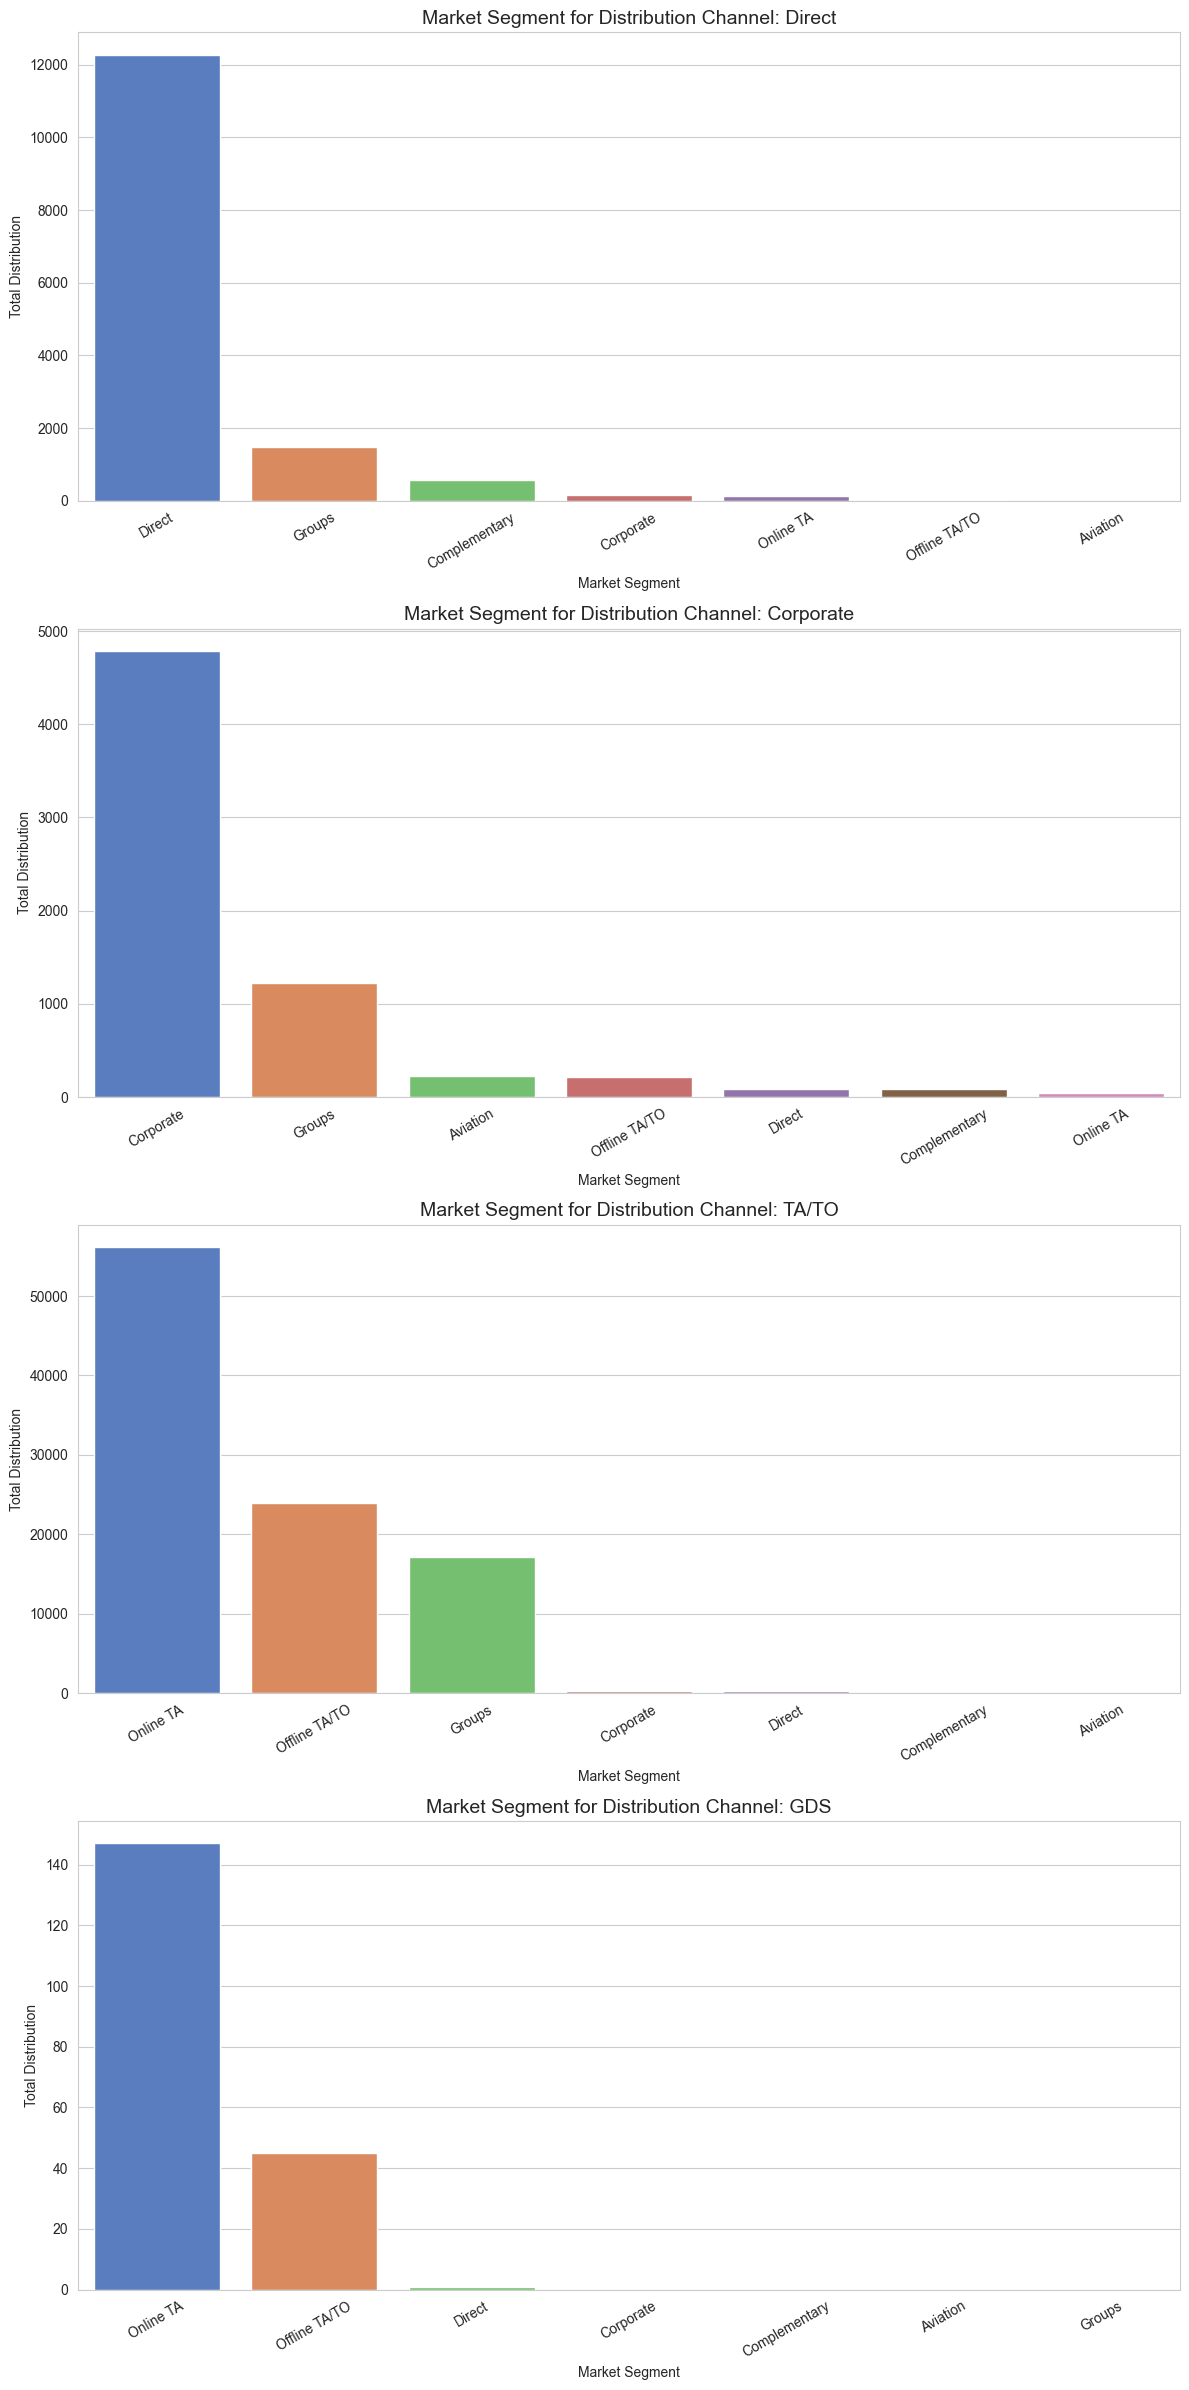

In [172]:
# Set Seaborn style
sns.set_style("whitegrid")

# Get unique distribution channels
distribution_channels = df["distribution_channel"].unique()

# Create subplots (one for each distribution channel)
fig, axes = plt.subplots(nrows=len(distribution_channels), ncols=1, figsize=(12, 6 * len(distribution_channels)))

# Iterate through each distribution channel and create a subplot
for i, channel in enumerate(distribution_channels):
    ax = axes[i] if len(distribution_channels) > 1 else axes  # Handle single subplot case
    subset = df[df["distribution_channel"] == channel]  # Filter data for specific channel
    
    # Count values for sorting
    sorted_order = subset["market_segment"].value_counts().index  # Sort by count
    
    # Countplot for each distribution channel (sorted in descending order)
    sns.countplot(data=subset, x="market_segment", palette="muted", ax=ax, order=sorted_order)
    
    # Formatting
    ax.set_title(f"Market Segment for Distribution Channel: {channel}", fontsize=14)
    ax.set_xlabel("Market Segment")
    ax.set_ylabel("Total Distribution")
    ax.tick_params(axis='x', rotation=30)  # Rotate labels for readability

# Adjust layout
plt.tight_layout()
plt.show()


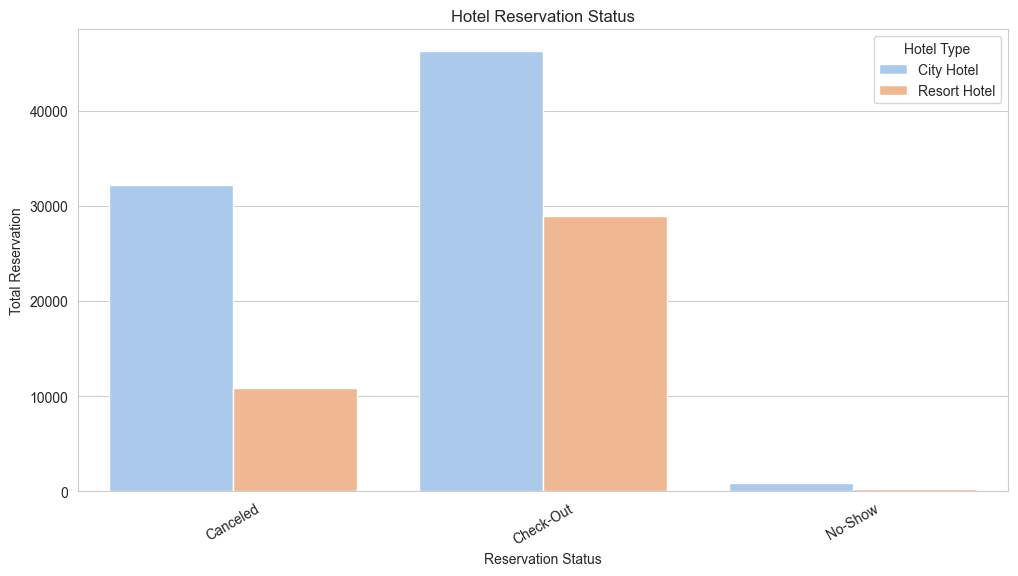

In [174]:
# Hotel Reservation Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="reservation_status", hue="hotel", palette="pastel")

# Add title and labels
plt.title("Hotel Reservation Status")
plt.xlabel("Reservation Status")
plt.ylabel("Total Reservation")
plt.legend(title="Hotel Type")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Show the plot
plt.show()

In [175]:
# Exploring the number of countries involved
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'num']
print(country_counts.head())  # Display top countries with most bookings

  country    num
0     PRT  48590
1     GBR  12129
2     FRA  10415
3     ESP   8568
4     DEU   7287


C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\2688257504.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cancellation Status")


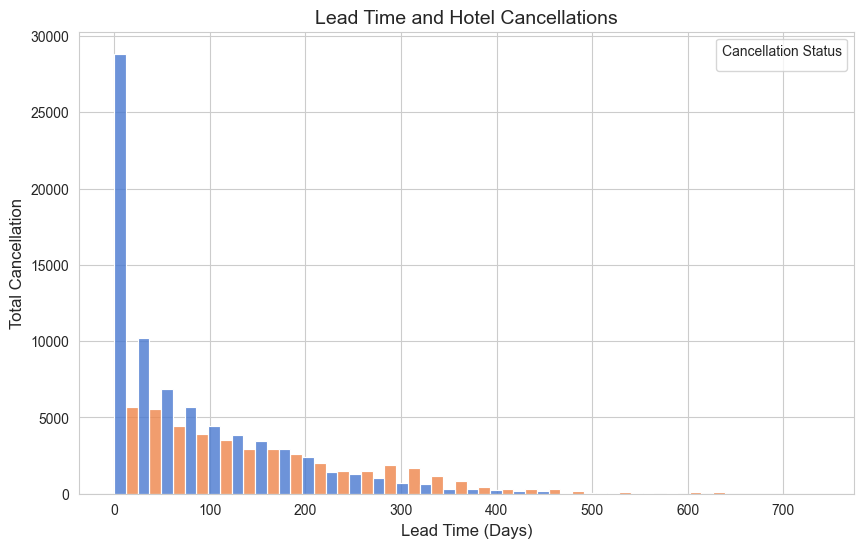

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")

# Corrected Lead Time and Hotel Cancellations Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=30, multiple="dodge", palette="muted", alpha=0.8)

# Add title and labels
plt.title("Lead Time and Hotel Cancellations", fontsize=14)
plt.xlabel("Lead Time (Days)", fontsize=12)
plt.ylabel("Total Cancellation", fontsize=12)
plt.legend(title="Cancellation Status")

# Show the plot
plt.show()

# 1day, 2-7, 8-30, 31-60 days

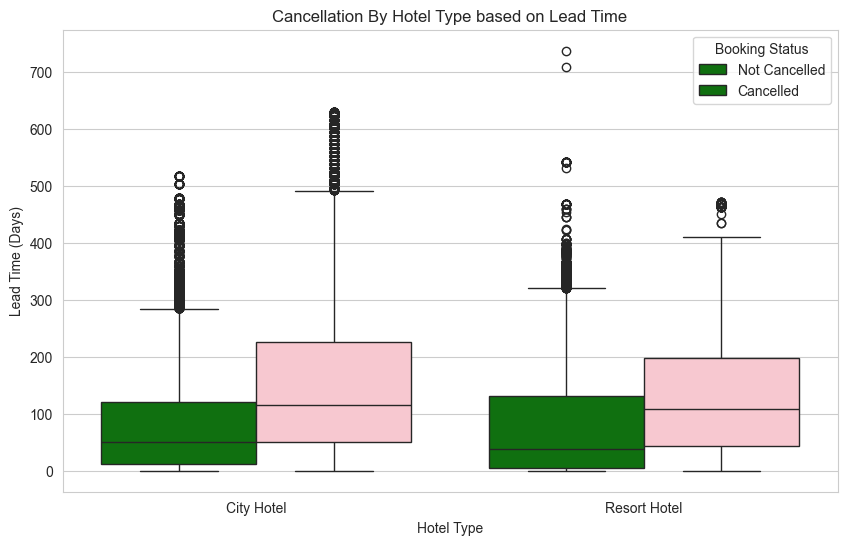

In [114]:
# Convert 'is_canceled' to a string category
df['is_canceled'] = df['is_canceled'].astype(str)

# Cancellation by Hotel Type based on Lead Time (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="hotel", y="lead_time", hue="is_canceled", 
            palette={"0": "green", "1": "pink"})

# Add title and labels
plt.title("Cancellation By Hotel Type based on Lead Time")
plt.xlabel("Hotel Type")
plt.ylabel("Lead Time (Days)")
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])

# Show the plot
plt.show()


In [115]:
# Remove NA values in 'children' column
df['children'].fillna(round(df['children'].mean(), 0), inplace=True)

# Checking if there are still missing values
print(df['children'].isna().sum())

0


C:\Users\Personal\AppData\Local\Temp\ipykernel_1376\2263785000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(round(df['children'].mean(), 0), inplace=True)


# Making models

Changing size of dataset

In [116]:
df = df.sample(5000)

In [117]:
df.shape

(5000, 32)

now we will begin with mkaing models

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Train and test split (25% test, 75% train)
train, test = train_test_split(df, test_size=0.25, random_state=100)

# Display first few rows of training set
train.head()

               hotel is_canceled  lead_time  arrival_date_year  \
23829   Resort Hotel           0          0               2016   
56308     City Hotel           1         40               2016   
39508   Resort Hotel           0        206               2017   
86382     City Hotel           0         53               2016   
114065    City Hotel           0         30               2017   

       arrival_date_month  arrival_date_week_number  \
23829                 May                        19   
56308           September                        36   
39508              August                        33   
86382               March                        14   
114065               June                        24   

        arrival_date_day_of_month  stays_in_weekend_nights  \
23829                           4                        0   
56308                           3                        1   
39508                          13                        2   
86382                   

In [119]:
# Selecting relevant features
features = ['hotel', 'lead_time', 'adults', 'children', 'babies', 'meal',
            'market_segment', 'distribution_channel', 'is_repeated_guest',
            'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 
            'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
            'required_car_parking_spaces', 'stay_nights_total', 'stay_cost_total', 'arrival_date_month']

# Ensure only existing features are used
existing_features = [col for col in features if col in train.columns]

# Handle categorical variables safely
categorical_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                    'reserved_room_type', 'deposit_type', 'customer_type', 'arrival_date_month']

# Only encode categorical columns that exist in the dataset
categorical_cols = [col for col in categorical_cols if col in train.columns]

# Encode categorical variables using one-hot encoding
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True, dtype=int)
test = pd.get_dummies(test, columns=categorical_cols, drop_first=True, dtype=int)

# Align test dataset to have the same columns as train
missing_cols = set(train.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0  # Add missing columns with default value 0

# Ensure train and test have the same features
common_features = train.columns.intersection(test.columns)
X_train = train[common_features].copy()
X_test = test[common_features].copy()

# Ensure 'is_canceled' is the target variable
y_train = train['is_canceled'].astype(int)
y_test = test['is_canceled'].astype(int)

# Drop constant columns (single unique value)
constant_cols = [col for col in X_train.columns if X_train[col].nunique() == 1]
if constant_cols:
    print(f"Dropping constant columns: {constant_cols}")
    X_train.drop(columns=constant_cols, inplace=True, errors='ignore')
    X_test.drop(columns=constant_cols, inplace=True, errors='ignore')

Dropping constant columns: ['reserved_room_type_L', 'reserved_room_type_P']


In [120]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all categorical variables are properly encoded before correlation computation
X_train = pd.get_dummies(X_train, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, drop_first=True, dtype=int)

# Align test dataset to match train dataset
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns with default value 0

# Ensure feature alignment
X_test = X_test[X_train.columns]

print("Drop constant columns")
# Drop constant columns (single unique value)
constant_cols = [col for col in X_train.columns if X_train[col].nunique() == 1]
if constant_cols:
    print(f"Dropping constant columns: {constant_cols}")
    X_train.drop(columns=constant_cols, inplace=True, errors='ignore')
    X_test.drop(columns=constant_cols, inplace=True, errors='ignore')

print("Drop highly correlated features")
# Drop highly correlated features (Multicollinearity Fix)
corr_matrix = X_train.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]

if to_drop:
    print(f"Dropping highly correlated features: {to_drop}")
    X_train.drop(columns=to_drop, inplace=True, errors='ignore')
    X_test.drop(columns=to_drop, inplace=True, errors='ignore')

# Drop columns with extremely low variance (redundant variables)
low_variance_cols = [col for col in X_train.columns if X_train[col].var() < 1e-6]
if low_variance_cols:
    print(f"Dropping low variance columns: {low_variance_cols}")
    X_train.drop(columns=low_variance_cols, inplace=True, errors='ignore')
    X_test.drop(columns=low_variance_cols, inplace=True, errors='ignore')

# Compute Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Drop features with high VIF (>5)
high_vif_cols = vif_data[vif_data["VIF"] > 5]["Feature"].tolist()
if high_vif_cols:
    print(f"Dropping high VIF columns: {high_vif_cols}")
    X_train.drop(columns=high_vif_cols, inplace=True, errors='ignore')
    X_test.drop(columns=high_vif_cols, inplace=True, errors='ignore')

# Add constant for intercept in logistic regression
X_train = sm.add_constant(X_train, has_constant='add')
X_test = sm.add_constant(X_test, has_constant='add')

print("Training logistic model")
# Build logistic regression model
logit_model_1 = sm.Logit(y_train, X_train).fit()

# Summary of the logistic regression model
print(logit_model_1.summary())


Dropping constant columns: ['country_AIA', 'country_AND', 'country_ARM', 'country_ASM', 'country_ATA', 'country_ATF', 'country_BDI', 'country_BEN', 'country_BFA', 'country_BGD', 'country_BHR', 'country_BHS', 'country_BLR', 'country_BOL', 'country_BRB', 'country_BWA', 'country_CAF', 'country_CMR', 'country_COM', 'country_CRI', 'country_CUB', 'country_CYM', 'country_DJI', 'country_DMA', 'country_DOM', 'country_ECU', 'country_ETH', 'country_FJI', 'country_FRO', 'country_GAB', 'country_GGY', 'country_GHA', 'country_GIB', 'country_GLP', 'country_GTM', 'country_GUY', 'country_HKG', 'country_HND', 'country_IDN', 'country_IMN', 'country_IRQ', 'country_JAM', 'country_JEY', 'country_KAZ', 'country_KEN', 'country_KHM', 'country_KIR', 'country_KNA', 'country_LAO', 'country_LBY', 'country_LCA', 'country_LIE', 'country_LKA', 'country_MDG', 'country_MDV', 'country_MKD', 'country_MLI', 'country_MMR', 'country_MNE', 'country_MRT', 'country_MWI', 'country_MYT', 'country_NAM', 'country_NCL', 'country_NIC

c:\Users\Personal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


KeyboardInterrupt: 

In [ ]:
# Remove the constant column for VIF calculation (if present)
X_train_vif = X_train.drop(columns=['const'], errors='ignore')

# Compute VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]

# Display VIF values
print("\nVariance Inflation Factor (VIF) Analysis:")
print(vif_data.sort_values(by="VIF", ascending=False))

In [ ]:
# Function to calculate VIF and drop high multicollinearity features iteratively
def remove_high_vif_features(X, threshold=5.0):
    """
    Removes features with VIF greater than the given threshold.
    
    Parameters:
    X (DataFrame): Feature matrix
    threshold (float): VIF threshold (default = 5.0)
    
    Returns:
    DataFrame: Reduced feature matrix with lower multicollinearity
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        max_vif = vif_data["VIF"].max()
        if max_vif < threshold:
            break  # Stop if no high VIF features remain

        # Drop the feature with highest VIF
        feature_to_drop = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Dropping '{feature_to_drop}' due to high VIF: {max_vif:.2f}")
        X = X.drop(columns=[feature_to_drop], errors='ignore')

    return X

# Remove 'const' (constant term) before VIF calculation
X_train_vif = X_train.drop(columns=['const'], errors='ignore')

# Stepwise VIF Removal
X_train_reduced = remove_high_vif_features(X_train_vif, threshold=5.0)

# Add constant back before logistic regression
X_train_reduced = sm.add_constant(X_train_reduced, has_constant='add')

# Build logistic regression model after multicollinearity fix
logit_model_2 = sm.Logit(y_train, X_train_reduced).fit()

# Summary of the new logistic regression model
print(logit_model_2.summary())

In [ ]:
# VIF after removing high multicollinearity features
vif_data_final = pd.DataFrame()
vif_data_final["Feature"] = X_train_reduced.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_train_reduced.values, i) for i in range(X_train_reduced.shape[1])]

print("\nFinal VIF Analysis After Feature Selection:")
print(vif_data_final.sort_values(by="VIF", ascending=False))

In [ ]:
# Function to calculate VIF and remove high multicollinearity features iteratively
def remove_high_vif_features(X, threshold=5.0):
    """
    Removes features with VIF greater than the given threshold.
    
    Parameters:
    X (DataFrame): Feature matrix
    threshold (float): VIF threshold (default = 5.0)
    
    Returns:
    DataFrame: Reduced feature matrix with lower multicollinearity
    """
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        max_vif = vif_data["VIF"].max()
        if max_vif < threshold:
            break  # Stop if no high VIF features remain

        # Drop the feature with highest VIF
        feature_to_drop = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
        print(f"Dropping '{feature_to_drop}' due to high VIF: {max_vif:.2f}")
        X = X.drop(columns=[feature_to_drop], errors='ignore')

    return X

# Remove 'const' (constant term) before VIF calculation
X_train_vif = X_train.drop(columns=['const'], errors='ignore')

In [ ]:
# === Step 1: Build Initial Model (logit_model_3) ===
X_train_reduced_3 = X_train_vif[['hotel', 'lead_time', 'adults', 'children', 'babies', 'meal',
                                  'distribution_channel', 'is_repeated_guest',
                                  'previous_cancellations', 'previous_bookings_not_canceled', 
                                  'reserved_room_type', 'booking_changes',
                                  'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
                                  'stay_nights_total']]

# Add constant before logistic regression
X_train_reduced_3 = sm.add_constant(X_train_reduced_3, has_constant='add')

# Fit logistic regression model
logit_model_3 = sm.Logit(y_train, X_train_reduced_3).fit()
print("\n==== Logistic Regression Model 3 Summary ====\n")
print(logit_model_3.summary())

# Compute VIF for Model 3
vif_data_3 = pd.DataFrame()
vif_data_3["Feature"] = X_train_reduced_3.columns
vif_data_3["VIF"] = [variance_inflation_factor(X_train_reduced_3.values, i) for i in range(X_train_reduced_3.shape[1])]

print("\nVIF Analysis for Model 3:")
print(vif_data_3.sort_values(by="VIF", ascending=False))

# === Step 2: Build Final Model After Removing High-VIF Features (logit_model_4) ===
X_train_reduced_4 = X_train_reduced_3.drop(columns=['days_in_waiting_list'], errors='ignore')  # Example of VIF-based removal

# Fit logistic regression model after VIF-based feature reduction
logit_model_4 = sm.Logit(y_train, X_train_reduced_4).fit()
print("\n==== Logistic Regression Model 4 Summary ====\n")
print(logit_model_4.summary())

# Compute VIF for Model 4
vif_data_4 = pd.DataFrame()
vif_data_4["Feature"] = X_train_reduced_4.columns
vif_data_4["VIF"] = [variance_inflation_factor(X_train_reduced_4.values, i) for i in range(X_train_reduced_4.shape[1])]

print("\nVIF Analysis for Model 4:")
print(vif_data_4.sort_values(by="VIF", ascending=False))

In [ ]:
import joblib  # For saving and loading models

# === Step 1: Build logit_model_5 ===
X_train_reduced_5 = X_train_reduced_4.drop(columns=['reserved_room_type'], errors='ignore')  # Example of further reduction

# Fit logistic regression model
logit_model_5 = sm.Logit(y_train, X_train_reduced_5).fit()
print("\n==== Logistic Regression Model 5 Summary ====\n")
print(logit_model_5.summary())

# === Step 2: Load logistic_model_4 (if previously saved) ===
try:
    logit_model_4 = joblib.load("logistic_model_4.pkl")
    print("\nLoaded logistic_model_4 successfully.")
except FileNotFoundError:
    print("\nlogistic_model_4.pkl not found. Ensure you save the model first.")

# === Step 3: Predictions using logit_model_4 ===
logit_pred_prob_4 = logit_model_4.predict(X_test)
logit_pred_class_4 = np.where(logit_pred_prob_4 > 0.5, 1, 0)

# Model evaluation for logit_model_4
accuracy_4 = np.mean(test["is_canceled"] == logit_pred_class_4)
print(f"\nAccuracy of logit_model_4: {accuracy_4:.4f}")

# Predictions on training data
train_logit_pred_prob_4 = logit_model_4.predict(X_train)
train_logit_pred_class_4 = np.where(train_logit_pred_prob_4 > 0.5, 1, 0)

# === Step 4: Predictions using logit_model_5 ===
logit_pred_prob_5 = logit_model_5.predict(X_test)
logit_pred_class_5 = np.where(logit_pred_prob_5 > 0.5, 1, 0)

# Model evaluation for logit_model_5
accuracy_5 = np.mean(test["is_canceled"] == logit_pred_class_5)
print(f"\nAccuracy of logit_model_5: {accuracy_5:.4f}")

# Predictions on training data
train_logit_pred_prob_5 = logit_model_5.predict(X_train)
train_logit_pred_class_5 = np.where(train_logit_pred_prob_5 > 0.5, 1, 0)

# === Step 5: Save logit_model_5 ===
joblib.dump(logit_model_5, "logistic_model_5.pkl")
print("\nlogistic_model_5 saved successfully.")